In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers, regularizers

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Original shape: (32, 32, 3)


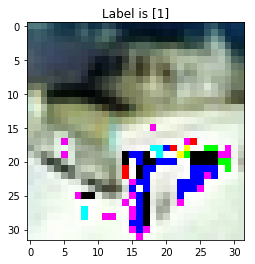

Original shape: (32, 32, 3)


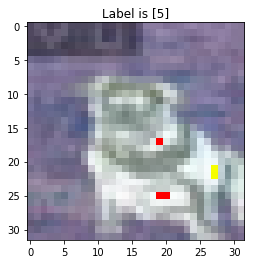

Original shape: (32, 32, 3)


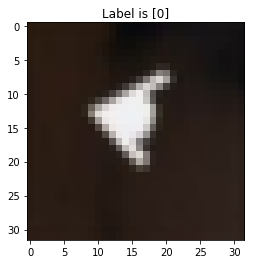

In [4]:
for i in range(1520,1523):
    print("Original shape: {}".format(x_train[i].shape))
    pixels, label = x_train[i], y_train[i]
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels)
    plt.grid(False)
    plt.show()

In [5]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

batch_size = 100

In [6]:
X_test.shape

(10000, 3072)

## Logistic regression

In [10]:
model = Sequential()
model.add(Dense(10, input_shape=(3072,)))
model.add(Activation('softmax'))

In [11]:
sgd = optimizers.SGD(lr=0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=20,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s - loss: 14.4572 - acc: 0.0999 - val_loss: 14.5057 - val_acc: 0.1000

## One hidden layer

In [19]:
model = Sequential()
model.add(Dense(1000, input_shape=(3072,)))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
  100/50000 [..............................] - ETA: 56s - loss: 1.7131 - acc: 0.3400

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


50000/50000 [==============================] - 47s - loss: 1.5161 - acc: 0.4590 - val_loss: 1.5420 - val_acc: 0.4528

### ^ it takes too long, so my laptop freezes, so I finished after several epochs and killed

## Batch normalization

In [25]:
model = Sequential()
model.add(Dense(1000, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

In [26]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=2,
          verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
  100/50000 [..............................] - ETA: 61s - loss: 1.2319 - acc: 0.6000

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


50000/50000 [==============================] - 64s - loss: 1.4554 - acc: 0.4882 - val_loss: 1.8068 - val_acc: 0.3754

In [29]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,
          verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
  100/50000 [..............................] - ETA: 59s - loss: 1.4779 - acc: 0.5000

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


50000/50000 [==============================] - 61s - loss: 1.4348 - acc: 0.4940 - val_loss: 1.6524 - val_acc: 0.4211

In [30]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,
          verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
  100/50000 [..............................] - ETA: 50s - loss: 1.4102 - acc: 0.5100

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


50000/50000 [==============================] - 69s - loss: 1.4242 - acc: 0.4962 - val_loss: 1.6692 - val_acc: 0.4148

### Batch_size *= 2   # it increased the accuracy a bit

In [31]:
model.fit(X_train, Y_train, batch_size=2 * batch_size, nb_epoch=1,
          verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
  200/50000 [..............................] - ETA: 43s - loss: 1.5466 - acc: 0.4650

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


50000/50000 [==============================] - 44s - loss: 1.3550 - acc: 0.5212 - val_loss: 1.5447 - val_acc: 0.4527

In [32]:
model.fit(X_train, Y_train, batch_size=2 * batch_size, nb_epoch=1,
          verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
  200/50000 [..............................] - ETA: 43s - loss: 1.2712 - acc: 0.5800

/home/gelkin/Development/anaconda3/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


50000/50000 [==============================] - 45s - loss: 1.3385 - acc: 0.5287 - val_loss: 1.5654 - val_acc: 0.4565

### Results:
* Logistic regression (20 epochs): val_acc: 0.3278
* One hidden layer (2 epochs): val_acc: 0.4279
* Batch normalization on one hidden layer (4 epochs): val_acc: 0.4148
* 2x bigger bat